# SUPERVISED LEARNING PROJECT




Importing the neccessary libraries

In [1]:
## Necessary libraries are imported

import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.stats import zscore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import os

# Step 1: Analyze Attributes 

In [2]:
# Load the Dataset

df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Shape of dataframe

df.shape

(5000, 14)

In [4]:
# Data types in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Total number of missing values in dataframe

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Thus we checked that there are no missing values in the data frame.



In [6]:
# 5-Point Summary of Numerical Attributes

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Column 'Experience' has negative values, which we will replace with the median value of the column.

In [7]:
any(df['Experience'] < 0)

True

In [8]:
exp_med = df.loc[:,"Experience"].median()
df.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)
any(df['Experience'] < 0)

False

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


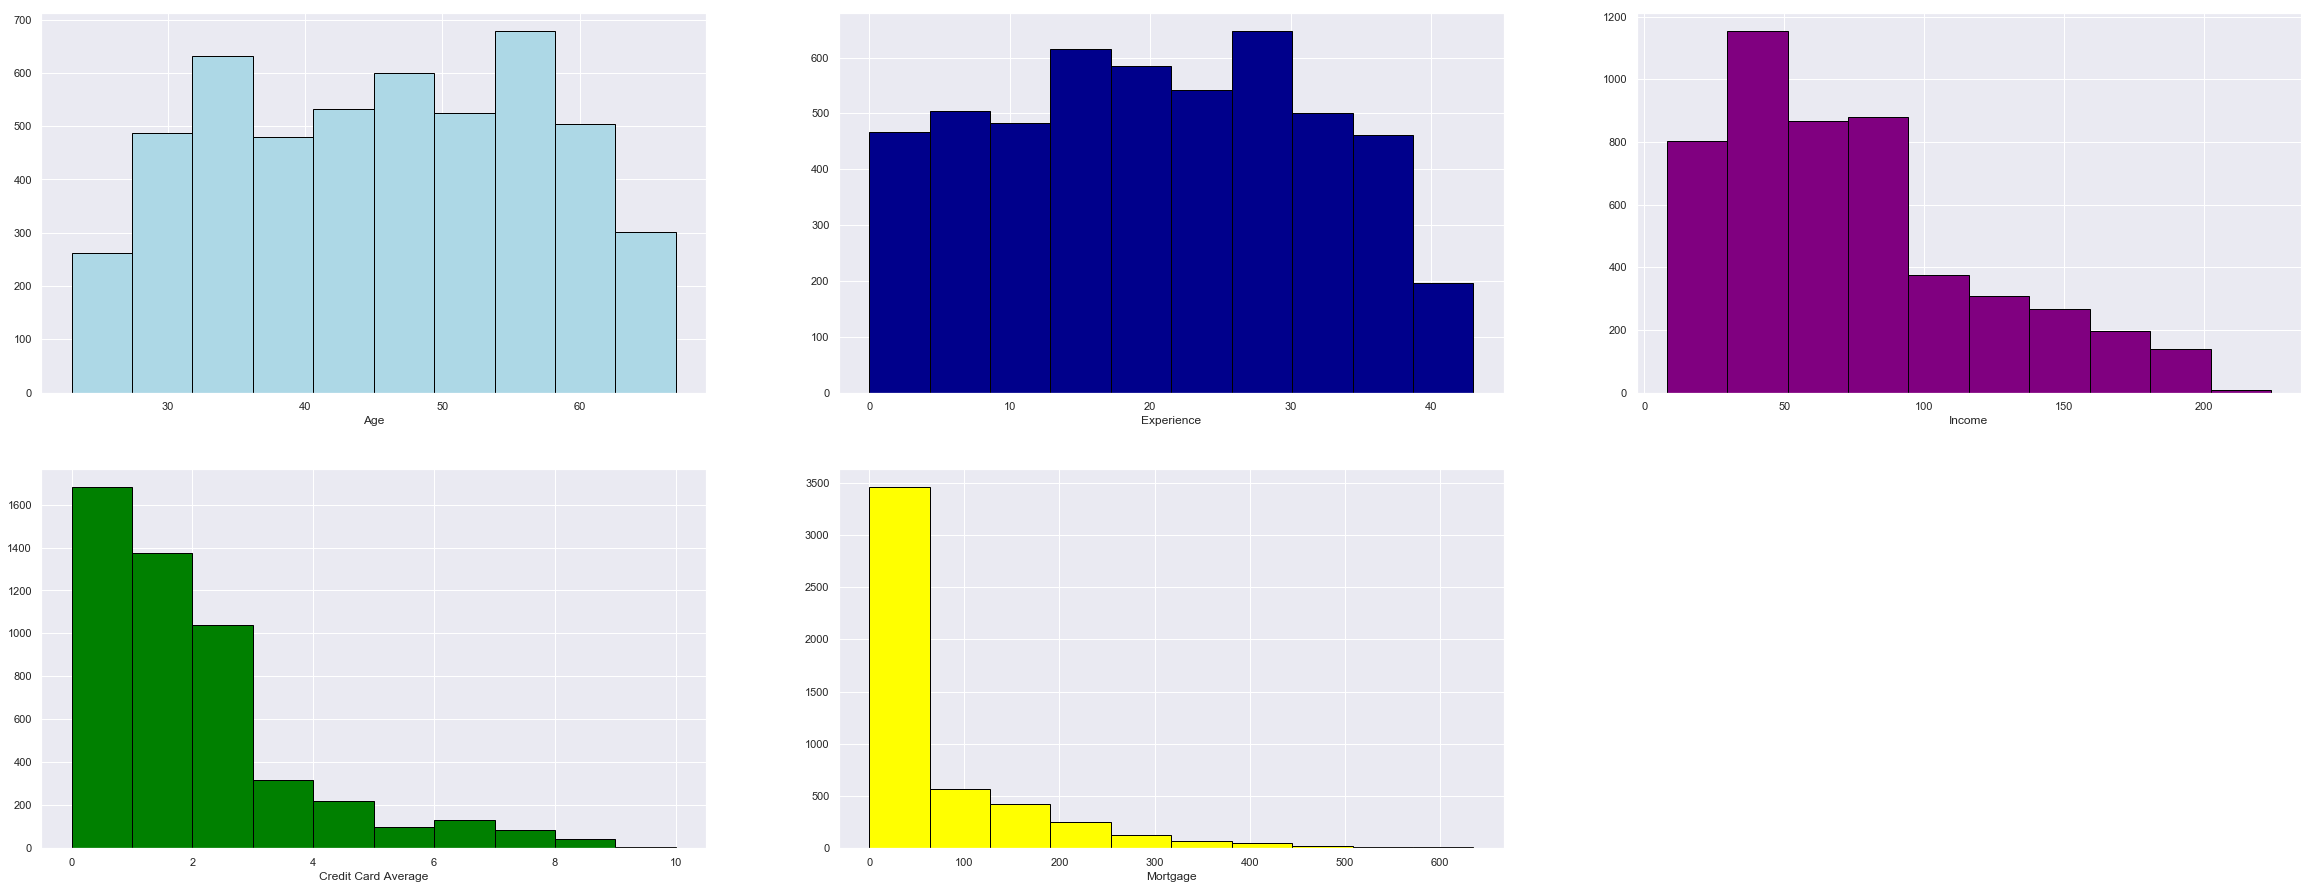

In [10]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(df.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(df.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(df.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(df.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(df.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

OBSERVATIONS:

- Age & Experience seems to be quiet normally distributed
- Income, CC Average & Mortgage are highly skewed

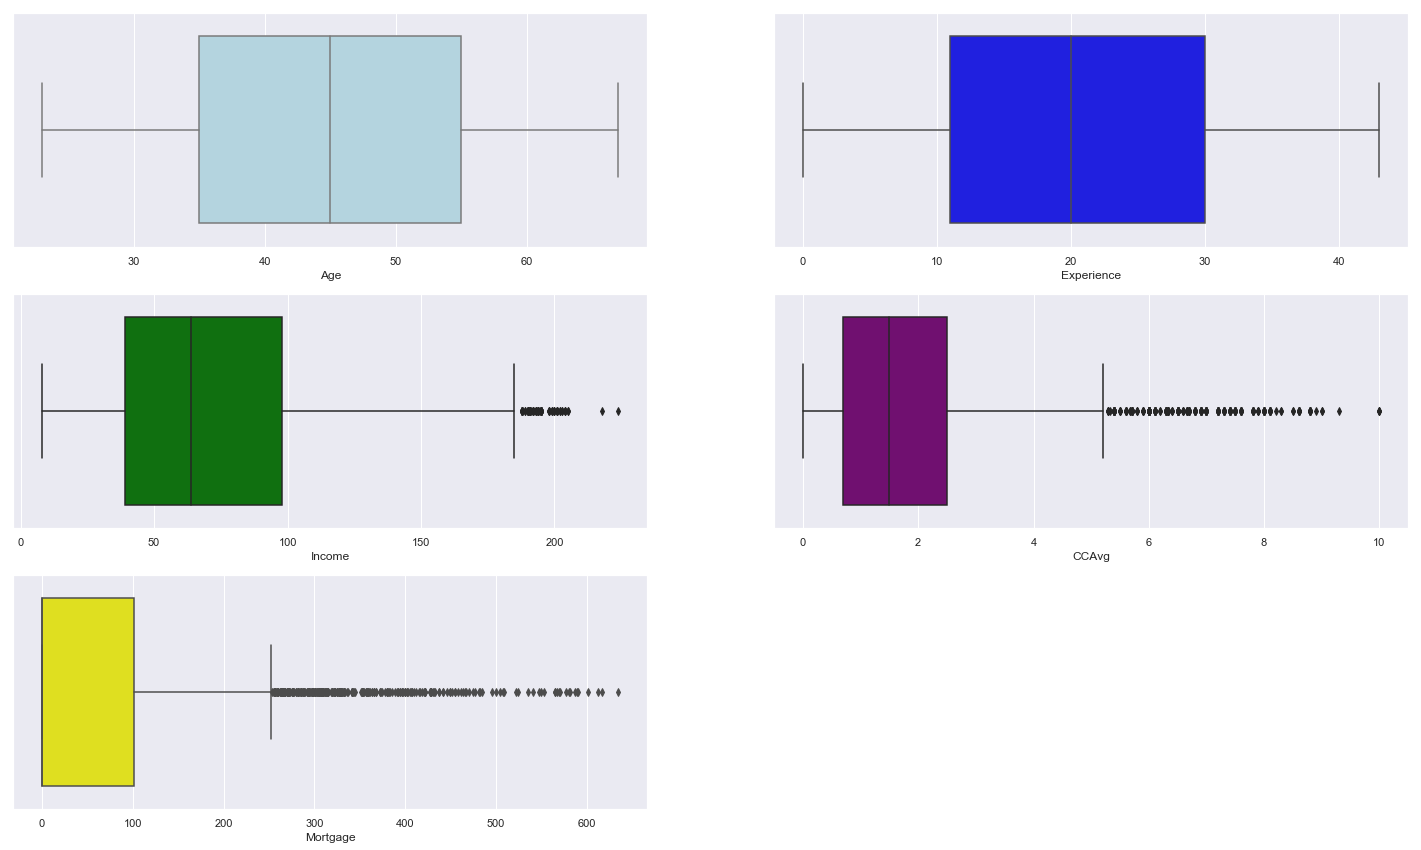

In [14]:
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= df.Age, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= df.Experience, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= df.Income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= df.CCAvg, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= df.Mortgage, color='yellow')

OBSERVATIONS:

- Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.

- Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.

- Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

- CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

- Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

In [15]:
# Measure of Skewness of columns:

df.skew(axis=0)

ID                     0.000000
Age                   -0.029341
Experience            -0.014100
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

NOTE:

A skewness value of 0 in the output denotes a symmetrical distribution.

A negative skewness value indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.

A positive skewness value indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.

Text(0.5, 1.0, 'Credit Card Distribution')

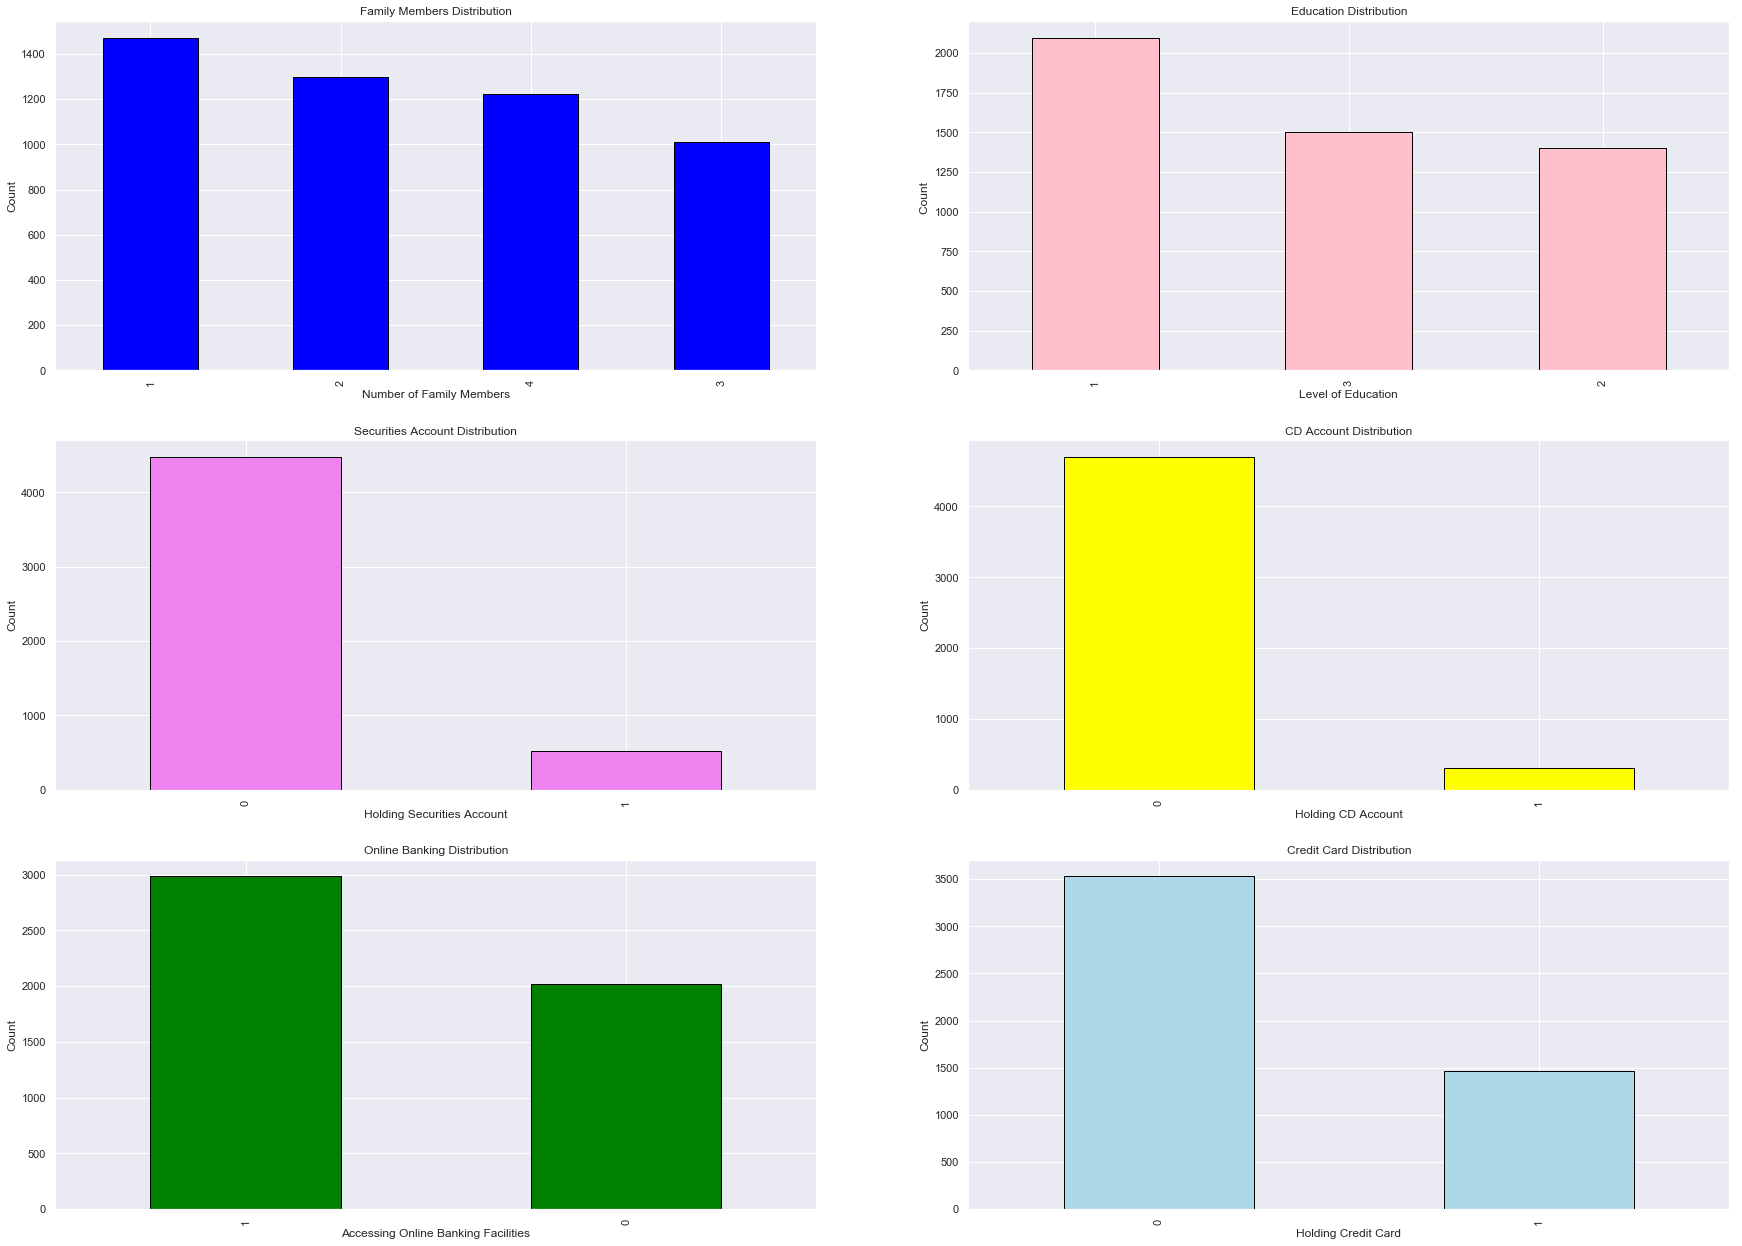

In [16]:
plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")

plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

OBSERVATIONS:

- The variables family and education are ordinal variables. The distribution of families is evenly distributed
- It seems that many of the population is not holding Securities Account and CD Account, vast difference is visible

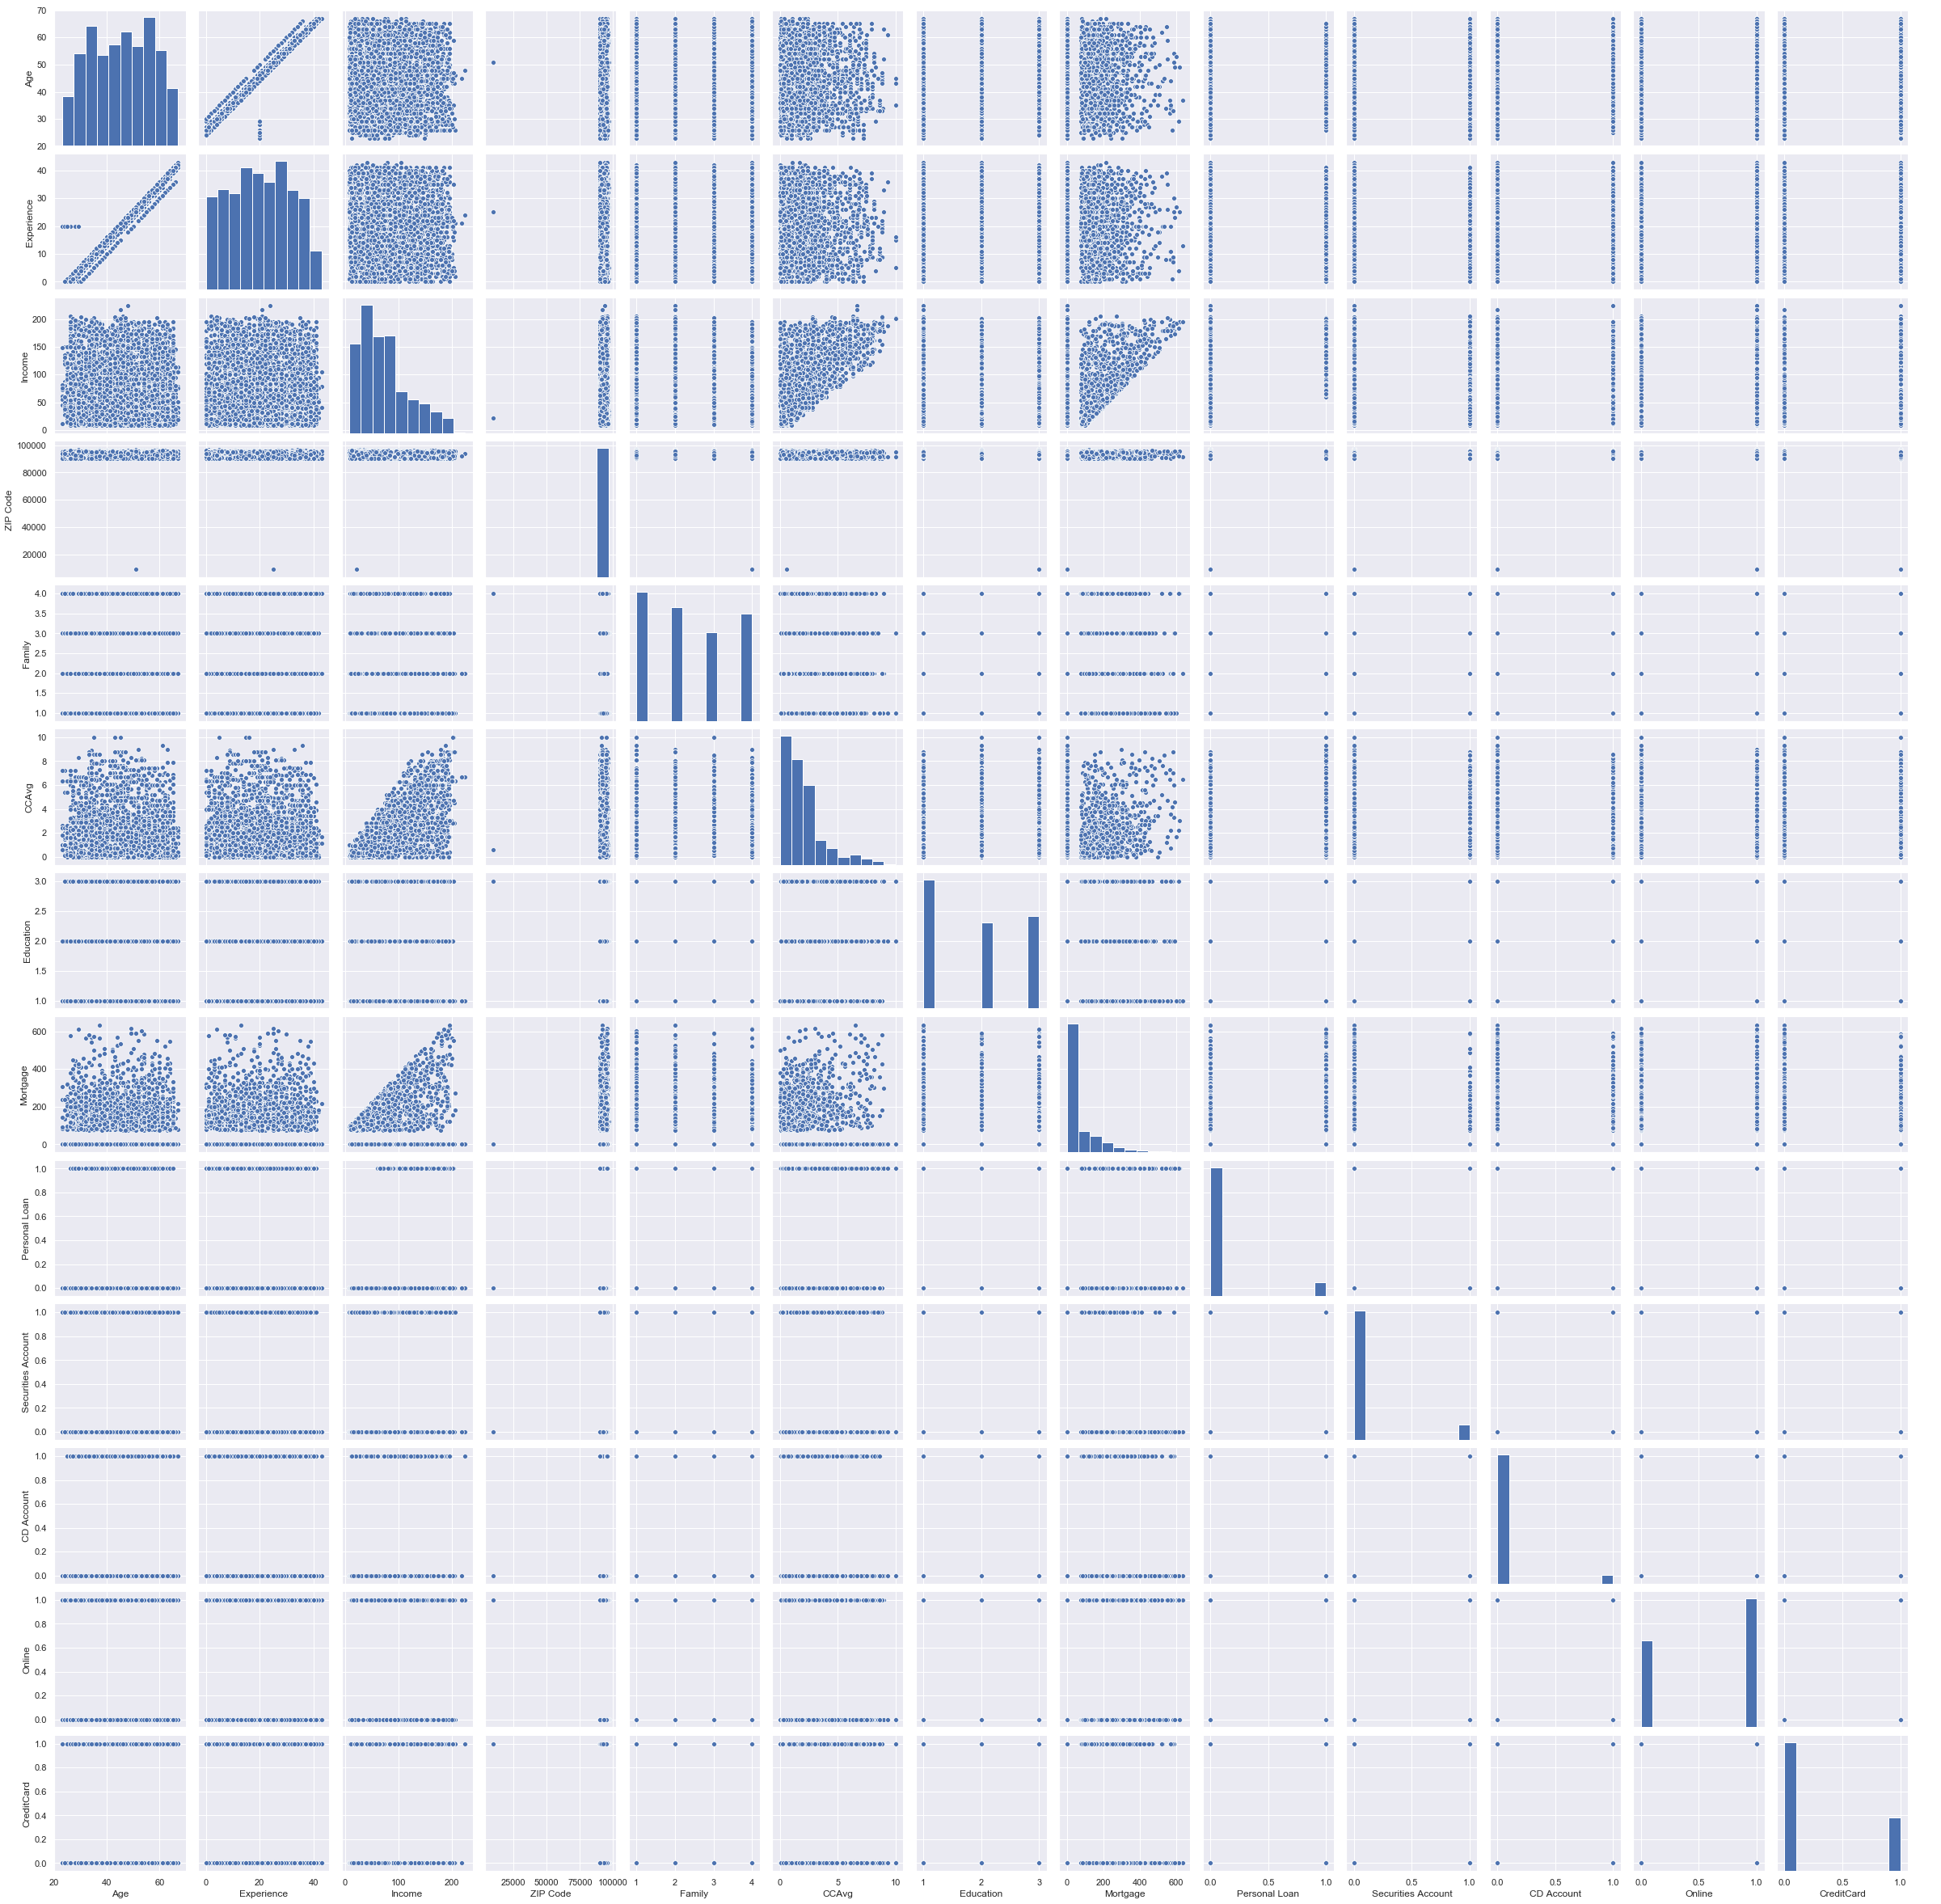

In [17]:
#Pairplot

sns.pairplot(df.iloc[:,1:])

OBSERVATION:

- 'Age' has an association with 'Experience'

# Target Column Analysis

In [18]:
df["Personal Loan"].value_counts().to_frame()

,Personal Loan
0,4520
1,480


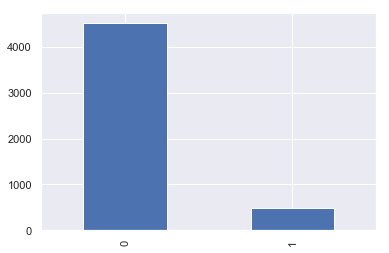

In [19]:
pd.value_counts(df["Personal Loan"]).plot(kind="bar")

NOTE:

1. From the above boxplots, we have checked that there are outliers present in 'bmi' and 'charges' columns.
2. No outliers present in 'age' column.

In [20]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


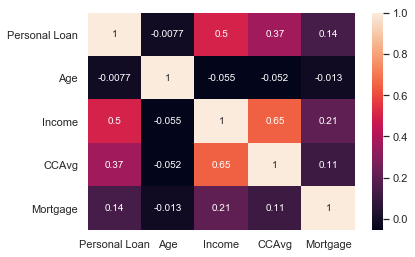

In [21]:
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

OBSERVATION:

- The above diagram shows a clear vision on the correlation between the independant variable and dependant variables, we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

# Split Data Into 70:30 Ratio

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
predict = logmodel.predict(X_Test)
predictProb = logmodel.predict_proba(X_Test)

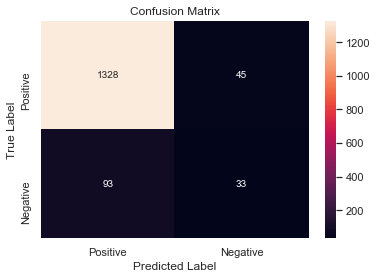

In [33]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
# Classification Report
print(classification_report(Y_Test, predict))
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predict)
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1373
           1       0.42      0.26      0.32       126

   micro avg       0.91      0.91      0.91      1499
   macro avg       0.68      0.61      0.64      1499
weighted avg       0.89      0.91      0.90      1499

0.907938625751


# KNN

In [36]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [37]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)
    
    # Predict the response
    Y_Pred = knn.predict(X_Test)
    
    # Evaluate accuracy
    scores = accuracy_score(Y_Test, Y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


In [38]:
knn = KNeighborsClassifier(n_neighbors= 13 , weights = 'uniform', metric = 'euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.911274182789


Text(0, 0.5, 'Misclassification Error')

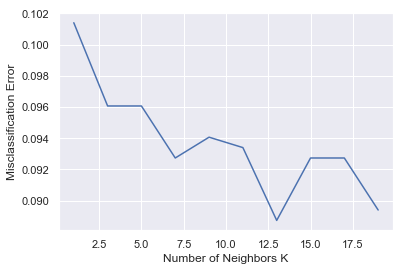

In [39]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

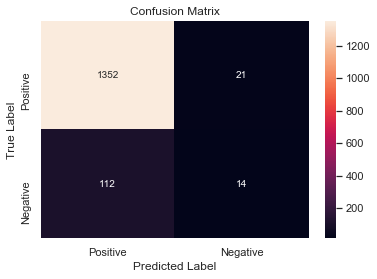

In [40]:
# Confusion Matrix
cm1 = confusion_matrix(Y_Test, predicted)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [41]:
# Classification Report
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1373
           1       0.40      0.11      0.17       126

   micro avg       0.91      0.91      0.91      1499
   macro avg       0.66      0.55      0.56      1499
weighted avg       0.88      0.91      0.89      1499



# Naive Bayes

In [42]:
# Model
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.88666666666666671

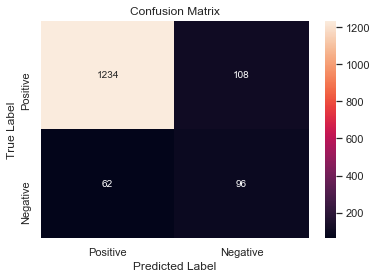

In [43]:
# Confusion Matrix
cm2 = confusion_matrix(test_labels, prediction)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
# Classififcation Report
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.61      0.53       158

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



# Model Comparison

KNN: 0.898600 (0.008902)
LR: 0.908800 (0.007756)
NB: 0.885600 (0.010385)


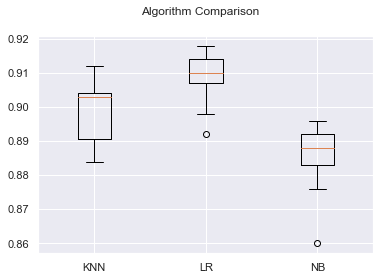

In [46]:
from sklearn import model_selection

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

OBSERVATION:

- From the above graph , it seems like 'Logistic Regression' algorithm have the highest accuracy and we can choose that as our final model.